# **Karamoja 2017 Crop Season Analysis**

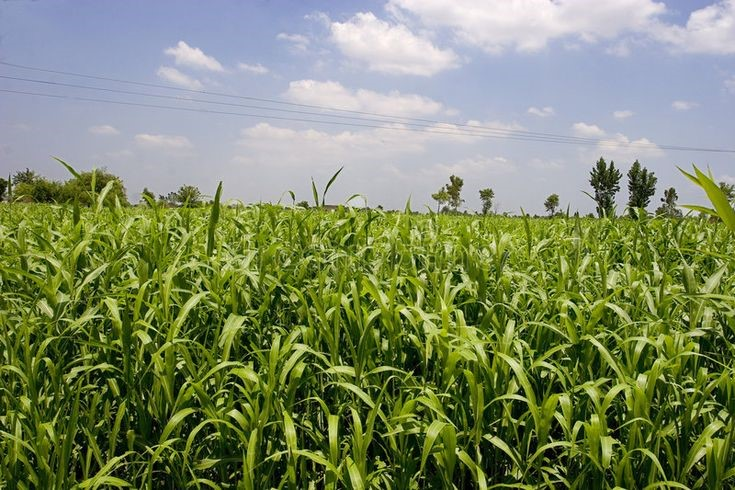

## Overview

[Karamoja](https://en.wikipedia.org/wiki/Karamoja) is the **most food-insecure** region of Uganda mainly as a result of low productivity level of the crops due to intense droughts as well as pest and disease outbreaks.

Several NGOs **provide technical support as well as farm inputs** to local farmers but their **efforts are hindered by limited visibility into the overall state of the region.** They rely heavily on fragmented local sources of information, making it difficult to target interventions effectively. In response, Dalberg Data Insights (DDI) applied a satellite-based methodology to remotely estimate crop yields for the region's two staple crops (sorghum and maize) during the 2017 season.

This project focuses on **creating an interactive visualizations of these results**, which will serve as a first mockup of the Food Security Monitoring Tool to guide future NGO activities.

## Business Objectives

The main objective of this project is to **develop an interactive visualization tool that supports NGOs in monitoring food security** conditions across Karamoja. Specifically, the project seeks to:
- Integrate population and production data to **highlight areas where food availabilty is critically low.**
- **Visualize crop yields and production for sorghum and maize** using satellite-based estimates at both district and subcounty levels.
- **Identify priority areas for NGO intervention** by revealing patterns of low productivity and high vulnerabilty.
- **Enable interactive exploration** through maps, charts and filters that allow users to compare regions and crop performance.

## Data Understanding

The data used in this analysis consists of **two datasets** which provide information concerning **yield and production of staple crops** (maize and sorghum) for **districts** and **sub-counties** in Karamoja region. The data provides the farming area in hectares, crop yield of both crops in hectares, productivity of both crops individually in kilograms as well as the population of the districts and sub-counties.

In [98]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading and Previewing Data

In [99]:
# Loading the data
district = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
subcounty = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')

#### District Data

Since the District data has only 7 rows we decided to preview the full dataset instead of slicing the first 5 rows.

In [100]:
# Previewing the dataset
district

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [101]:
# Printing the rows and columns resp.
district.shape

(7, 11)

In [102]:
# Printing the column names
district.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [103]:
# Printing a general summary of the dataset
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 748.0+ bytes


- The dataset has 7 rows and 11 columns.
- There are 10 numerical columns in the dataset and one categorical.
- There are no null values in any of the columns.

#### Sub-County Data

In [104]:
# Previewing the data
subcounty.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [105]:
# Printing the number of rows and columns resp.
subcounty.shape

(52, 13)

In [106]:
# printing the column names
subcounty.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [107]:
# Printing the general summary of the dataset
subcounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


- The dataset has 52 rows and 13 columns.
- There are 10 numerical columns; with majority being of the `float64` datatype and 3 categorical columns.
- There are no null values in the dataset

### Data Cleaning

#### District Data

In [108]:
# Checking for null values in the dataset
district.isnull().value_counts()

,,,,,,,,,,,count
OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,
False,False,False,False,False,False,False,False,False,False,False,7


In [109]:
# Checking for duplicates in the dataset
district.duplicated().value_counts()

,count
False,7


#### Sub-County Data

In [110]:
# Checking for null values in the dataset
subcounty.isnull().value_counts()

,,,,,,,,,,,,,count
OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,
False,False,False,False,False,False,False,False,False,False,False,False,False,52


In [111]:
# Checking for duplicates in the dataset
subcounty.duplicated().value_counts()

,count
False,52


Both datasets lack missing data and duplicates hence can be considered as **relatively clean**. We therefore decided to go on to feature engineering.

#### Feature Engineering

We decided to **create three new columns** in each dataset; one of which is the **total yield of both staple crops** `Total_Yield_Ha` in hectares the other is the **total productivity of the staple crops** `Total_Prod` and the other is the **average level of output per person** `prod_per_capita`

We went on to create a `area proportion column` to investigate the proportion of land allocated to sorghum and maize cultivation in the districts and also the overall proportion of land allocated to farming practices.

In [112]:
# District Data
district['Total_Yield_Ha'] = district['S_Yield_Ha'] + district['M_Yield_Ha']
district['Total_Prod'] = district['S_Prod_Tot'] + district['M_Prod_Tot']
district['prod_per_capita'] = district['Total_Prod']/district['POP']

# Sub-County Data
subcounty['Total_Yield_Ha'] = subcounty['S_Yield_Ha'] + subcounty['M_Yield_Ha']
subcounty['Total_Prod'] = subcounty['S_Prod_Tot'] + subcounty['M_Prod_Tot']
subcounty['prod_per_capita'] = subcounty['Total_Prod']/subcounty['POP']

In [113]:
# Previewing the data with the new columns
district.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield_Ha,Total_Prod,prod_per_capita
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,1489,3394073,37.551286
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,1502,4155110,40.820415
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,1224,12719553,20.284524
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,1479,18642479,76.668486
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,483,1029412,8.054174


In [114]:
# Creating the Area proportion column from the total area column
district['Total_Crop_Area'] = district['M_Area_Ha'] + district['S_Area_Ha']
district['Area_Proportion'] = district['Total_Crop_Area'] / district['Crop_Area_Ha']
district[['Crop_Area_Ha', 'Total_Crop_Area', 'Area_Proportion']]

,Crop_Area_Ha,Total_Crop_Area,Area_Proportion
0,5470.068394,5125.917826,0.937085
1,5765.443719,5707.084874,0.989878
2,28121.672530,27938.611294,0.993490
3,53032.649450,51998.816184,0.980506
4,5954.814048,5931.799382,0.996135
5,26372.698490,25663.121624,0.973094
6,22944.296020,22685.734946,0.988731


In [115]:
district['cropAreavs_Area'] = district['Total_Crop_Area'] / district['Area']
district[['cropAreavs_Area', 'Total_Crop_Area', 'Area']]

,cropAreavs_Area,Total_Crop_Area,Area
0,0.000002,5125.917826,2771977106
1,0.000003,5707.084874,1643582836
2,0.000004,27938.611294,7373606003
3,0.000014,51998.816184,3641539808
4,0.000002,5931.799382,3570160948
5,0.000006,25663.121624,4216323900
6,0.000005,22685.734946,4508782023


- The dataset shows a huge disparity between total land area and cultivated land, highlighting that **large tracts of land is uncultivable** due to unfavourable climates or ragged terrain.

In [116]:
# Previewing the data with the new columns
subcounty.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield_Ha,Total_Prod,prod_per_capita
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900,1491.674430,2.879816e+06,167.003924
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500,1530.887210,5.541496e+06,105.010249
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268,1536.320009,5.714680e+05,20.864872
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080,1135.691147,1.954668e+06,50.410512
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400,1657.696807,4.001549e+06,60.902666


### Exploratory Data Analysis

#### Univariate Analysis

##### District Data

In [117]:
# Printing the numerical summary of the dataset
district.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield_Ha,Total_Prod,prod_per_capita,Total_Crop_Area,Area_Proportion,cropAreavs_Area
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06,1255.428571,8.958730e+06,47.414877,20721.583733,0.979846,0.000005
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06,401.207701,6.612108e+06,32.304644,17058.844898,0.020435,0.000004
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05,483.000000,1.029412e+06,8.054174,5125.917826,0.937085,0.000002
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06,1107.500000,3.774592e+06,28.917905,5819.442128,0.976800,0.000003
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06,1479.000000,7.799792e+06,40.820415,22685.734946,0.988731,0.000004
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06,1495.500000,1.384512e+07,61.599842,26800.866459,0.991684,0.000006
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06,1620.000000,1.864248e+07,101.994059,51998.816184,0.996135,0.000014


In [129]:
# Finding the mean of the numerical columns
district.mean(numeric_only=True).drop('OBJECTID')

,0
POP,2.149436e+05
Area,3.960853e+09
S_Yield_Ha,2.692857e+02
M_Yield_Ha,9.861429e+02
Crop_Area_Ha,2.109452e+04
S_Area_Ha,1.673764e+04
M_Area_Ha,3.983947e+03
S_Prod_Tot,4.873098e+06
M_Prod_Tot,4.085632e+06
Total_Yield_Ha,1.255429e+03


In [130]:
# Finding the median of the numerical columns
district.median(numeric_only=True).drop('OBJECTID')

,0
POP,1.467800e+05
Area,3.641540e+09
S_Yield_Ha,2.790000e+02
M_Yield_Ha,1.040000e+03
Crop_Area_Ha,2.294430e+04
S_Area_Ha,1.614202e+04
M_Area_Ha,2.733661e+03
S_Prod_Tot,2.211456e+06
M_Prod_Tot,3.545558e+06
Total_Yield_Ha,1.479000e+03


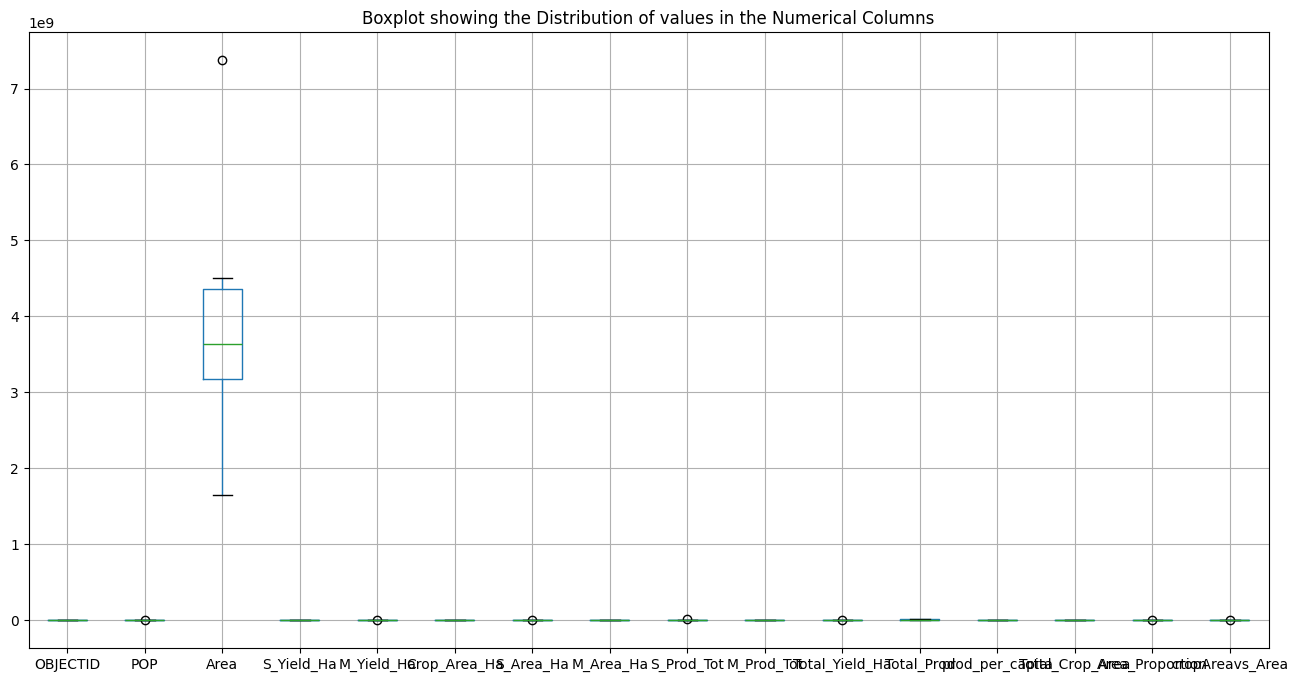

In [120]:
# Plotting a boxplot to show the distribution of values
plt.figure(figsize=(16, 8))
district.boxplot()
plt.title('Boxplot showing the Distribution of values in the Numerical Columns');

##### Sub-County Data

In [121]:
# Printing the numerical summary of the dataset
subcounty.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield_Ha,Total_Prod,prod_per_capita
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,52.000000
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05,1214.424957,1.205817e+06,46.056264
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05,406.380464,1.347164e+06,45.930606
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00,114.795569,1.967487e+01,0.006013
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04,956.190991,3.622575e+05,9.719828
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05,1322.012426,5.903609e+05,36.817439
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05,1532.245410,1.546602e+06,58.795656
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06,1885.567942,5.596386e+06,216.034970


In [131]:
# Finding the mean of the numerical columns
subcounty.mean(numeric_only=True).drop('OBJECTID')

,0
POP,2.893469e+04
Area,5.331913e+08
S_Yield_Ha,2.741654e+02
M_Yield_Ha,9.402596e+02
Crop_Area_Ha,2.839647e+03
S_Area_Ha,2.253143e+03
M_Area_Ha,5.363006e+02
S_Prod_Tot,6.557443e+05
M_Prod_Tot,5.500730e+05
Total_Yield_Ha,1.214425e+03


In [132]:
# Finding the median of the numerical columns
subcounty.median(numeric_only=True).drop('OBJECTID')

,0
POP,2.305350e+04
Area,3.848356e+08
S_Yield_Ha,2.772552e+02
M_Yield_Ha,1.016684e+03
Crop_Area_Ha,1.654265e+03
S_Area_Ha,1.231824e+03
M_Area_Ha,3.264793e+02
S_Prod_Tot,2.543687e+05
M_Prod_Tot,2.896239e+05
Total_Yield_Ha,1.322012e+03


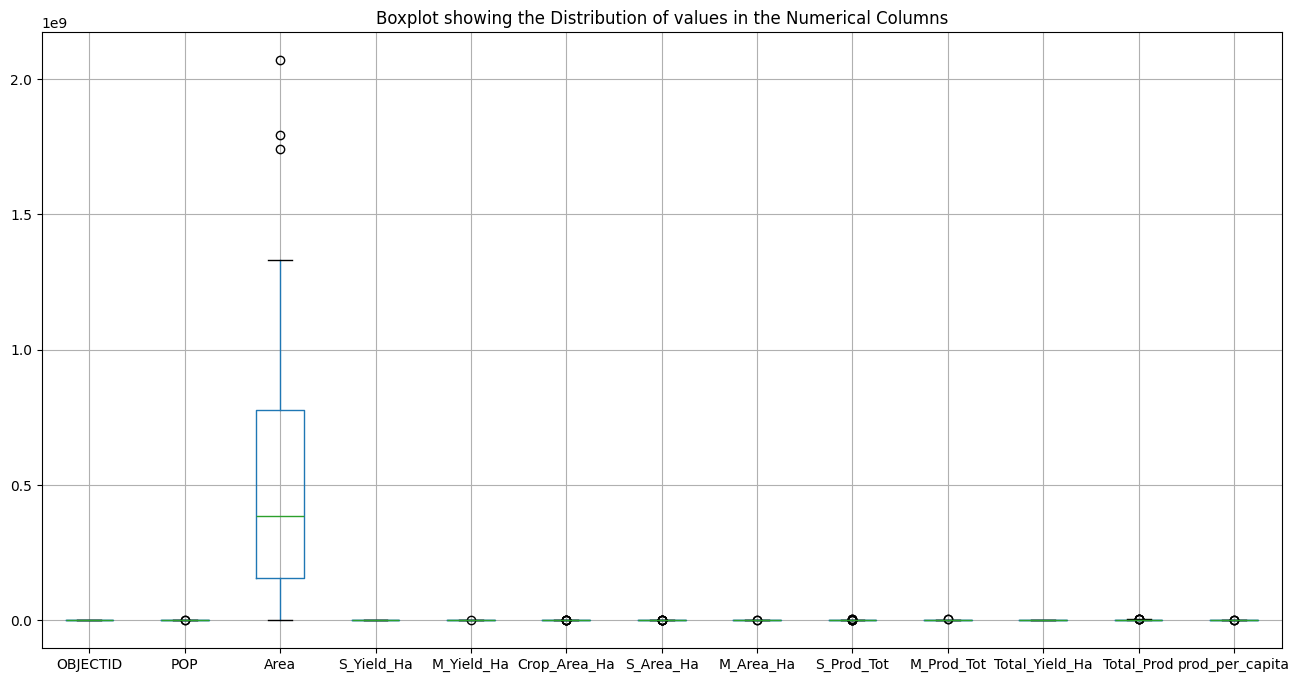

In [124]:
# Plotting a boxplot to show the distribution of values
plt.figure(figsize=(16, 8))
subcounty.boxplot()
plt.title('Boxplot showing the Distribution of values in the Numerical Columns');

#### Bivariate Analysis

##### District Data

For bivariate analysis, we did the correlation in both datasets making sure to remove the 'OBJECTTD' column as it is irrelevant in our analysis.

In [125]:
# Finding the correlation of each column to each other
dist_corr = district.corr(numeric_only=True)
dist_corr.drop("OBJECTID", axis=0, inplace=True)
dist_corr.drop("OBJECTID", axis=1, inplace=True)
dist_corr

,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield_Ha,Total_Prod,prod_per_capita,Total_Crop_Area,Area_Proportion,cropAreavs_Area
POP,1.000000,0.891900,0.024405,-0.032883,0.424930,0.353520,0.562697,0.300750,0.442555,-0.019102,0.453825,-0.236059,0.432915,0.365544,0.111158
Area,0.891900,1.000000,-0.036377,-0.212716,0.410245,0.310478,0.729935,0.224938,0.574620,-0.181303,0.445436,-0.133436,0.417228,0.323717,0.038741
S_Yield_Ha,0.024405,-0.036377,1.000000,0.565185,0.206778,0.215317,-0.073130,0.370599,0.104401,0.750204,0.367356,0.458793,0.198369,-0.835714,0.211803
M_Yield_Ha,-0.032883,-0.212716,0.565185,1.000000,0.300017,0.268343,0.212479,0.356662,0.449512,0.969476,0.505421,0.696216,0.294901,-0.328953,0.397377
Crop_Area_Ha,0.424930,0.410245,0.206778,0.300017,1.000000,0.988370,0.233298,0.952850,0.252674,0.301919,0.937658,0.558953,0.999926,0.171665,0.926199
S_Area_Ha,0.353520,0.310478,0.215317,0.268343,0.988370,1.000000,0.083128,0.976447,0.108703,0.279070,0.895509,0.530529,0.987679,0.144208,0.957288
M_Area_Ha,0.562697,0.729935,-0.073130,0.212479,0.233298,0.083128,1.000000,-0.008665,0.946280,0.148566,0.404236,0.216564,0.238058,0.257481,-0.059734
S_Prod_Tot,0.300750,0.224938,0.370599,0.356662,0.952850,0.976447,-0.008665,1.000000,0.074169,0.396009,0.900941,0.593234,0.950308,0.022267,0.951224
M_Prod_Tot,0.442555,0.574620,0.104401,0.449512,0.252674,0.108703,0.946280,0.074169,1.000000,0.391311,0.499567,0.445827,0.254548,0.146646,0.020567
Total_Yield_Ha,-0.019102,-0.181303,0.750204,0.969476,0.301919,0.279070,0.148566,0.396009,0.391311,1.000000,0.514275,0.694373,0.295319,-0.512038,0.381446


Some numerical columns have a relatively high positive correlation to each other such as the total crop area and the total productivity that have a correlation of ~0.9, while others are negatively corrrelated such as ObjectID and the area that have a correlation of ~ -0.6.

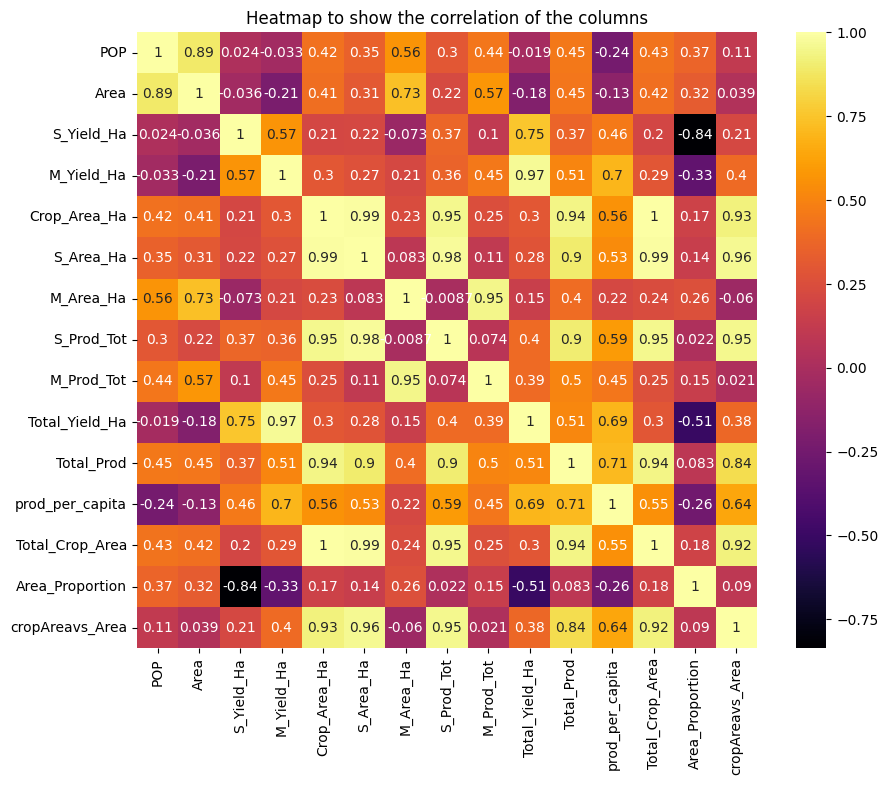

In [126]:
# Plotting a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(dist_corr, annot=True, cmap='inferno')
plt.title('Heatmap to show the correlation of the columns');

##### Sub-County

In [127]:
# Finding the correlation of each column to each other
sub_corr = subcounty.corr(numeric_only=True)
sub_corr.drop("OBJECTID", axis=0, inplace=True)
sub_corr.drop("OBJECTID", axis=1, inplace=True)
sub_corr

,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Yield_Ha,Total_Prod,prod_per_capita
POP,1.000000,0.257082,-0.081385,0.135996,0.392587,0.371068,0.157311,0.342992,0.144350,0.083892,0.337535,-0.134912
Area,0.257082,1.000000,0.005760,0.131586,0.328405,0.265610,0.307355,0.196369,0.262690,0.105829,0.299358,0.201056
S_Yield_Ha,-0.081385,0.005760,1.000000,0.624494,0.171402,0.110636,0.238892,0.288920,0.335797,0.786045,0.410567,0.473010
M_Yield_Ha,0.135996,0.131586,0.624494,1.000000,0.263790,0.221676,0.200557,0.316694,0.334450,0.973689,0.430217,0.433688
Crop_Area_Ha,0.392587,0.328405,0.171402,0.263790,1.000000,0.970304,0.261783,0.945518,0.282030,0.258795,0.862170,0.515173
S_Area_Ha,0.371068,0.265610,0.110636,0.221676,0.970304,1.000000,0.021327,0.958651,0.049947,0.207732,0.735055,0.398417
M_Area_Ha,0.157311,0.307355,0.238892,0.200557,0.261783,0.021327,1.000000,0.076654,0.962444,0.228439,0.623652,0.529399
S_Prod_Tot,0.342992,0.196369,0.288920,0.316694,0.945518,0.958651,0.076654,1.000000,0.127794,0.334955,0.811370,0.483610
M_Prod_Tot,0.144350,0.262690,0.335797,0.334450,0.282030,0.049947,0.962444,0.127794,1.000000,0.362686,0.683428,0.614567
Total_Yield_Ha,0.083892,0.105829,0.786045,0.973689,0.258795,0.207732,0.228439,0.334955,0.362686,1.000000,0.460299,0.481265


Some numerical columns have a relatively high positive correlation to each other such as the total crop area and the total productivity that have a correlation of ~0.8, while others are negatively corrrelated such as ObjectID and the sorghum productivity that have a correlation of ~ -0.5.

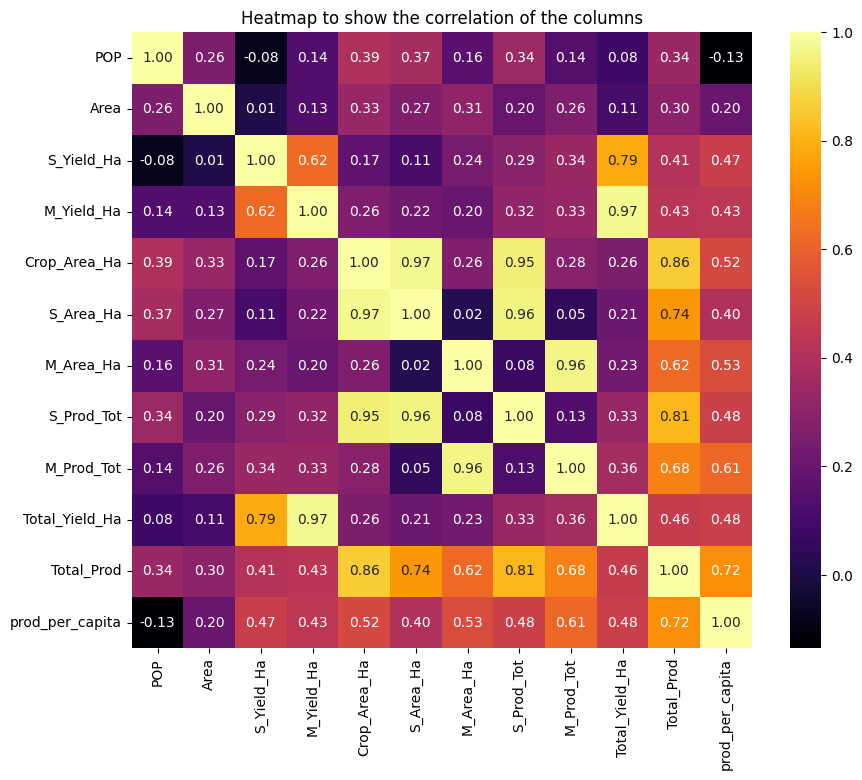

In [128]:
# Plotting a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(sub_corr, annot=True, fmt='.2f', cmap='inferno')
plt.title('Heatmap to show the correlation of the columns');

We then saved the clean datasets as `district_cleaned.csv` and `subcounty_cleaned.csv` for use in tableau for visualization. The clean datasets are accessible in the `data` folder in this repository.

## Analyses

The Charts below are snapshots of visualizations made using **tableau** therefore, they can not be manipulated using python code. For interactive manipulation, please refer to the tableau workbook linked at the bottom of the ReadMe file.

### Crop Contribution

**Kotido** stands out with the **highest sorghum production (~16M kg)**, significantly higher than all other districts. **Kaabong, Nakupiripirit and Napak** show **relatively balanced production** between maize and sorghum.** Abim and Amudat** are **low producers of both crops** compared to others. **Moroto** contributes **very little** to both maize and sorghum production.

The chart highlights **Kotido's dominance in sorghum production**, suggesting that sorghum is likely the best performing in that district. **Maize production is relatively stronger** in Nakapiripirit and Napak compared to other districts. The disparity in production volumes points to **differences in land area, soil suitability, or farmer preference** for crop type across districts.


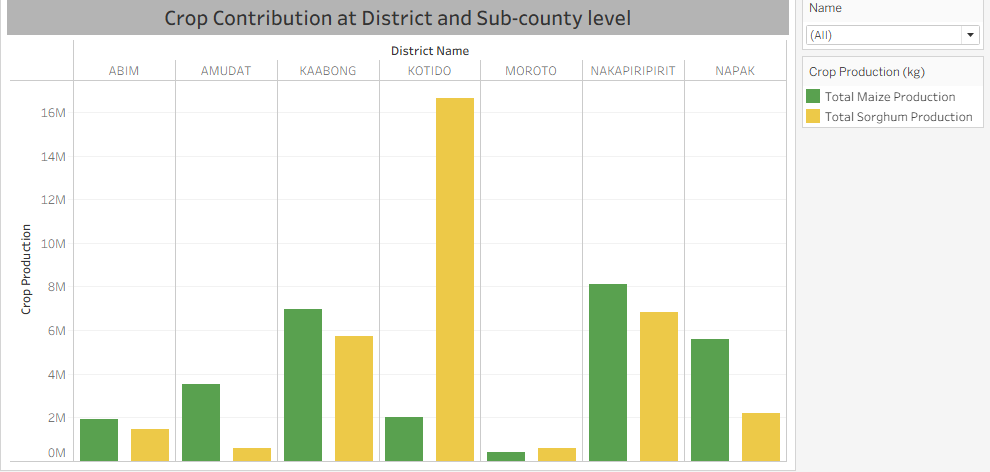

### Crop Yield

**Kaabong and Nakapiripirit perform well in maize yields (13,851 kg/Ha and 9,353 kg/Ha resp.)**, far surpassing other districts. **Sorghum yields are generally lower across all districts**, with Kaabong (3,664 kg/Ha) and Abim (2,582 kg/Ha) showing the strongest performance for sorghum. **Moroto has the lowest yields** for both crops indicating poor perfomance.

Although Kotido leads in production volumes, its total yield is lower than Kaabong's and Nakapiripirit's. This suggests that **Kotido has a large area of cultivation but lower efficiency**, while **Kaabang achieves better productivity per unit area**.** Sorghum appears less productive than maize overall**, possibly due to **lower inputs, poor agronomic practices, or environmental limitations**.

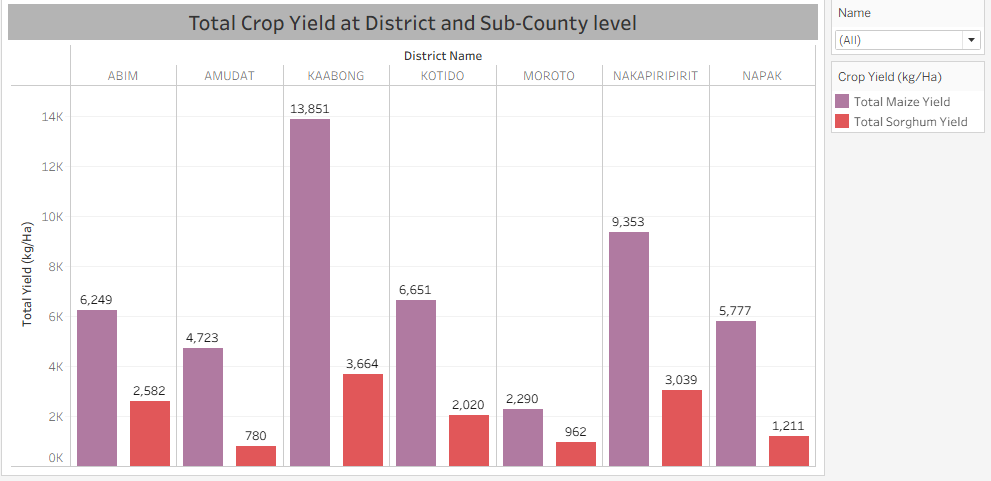

### Crop Area

**Kotido has the largest sorghum planting area** (~50,000 Ha), dwarfing maize cultivation. Kaabong and Nakupiripirit also favour sorghum cultivation over maize cultivation with both having close to 20,000 Ha for its cultivation. **Napak has a more balanced planting mix** with sorghum slightly ahead. **Abim, Amudat and Moroto have very small planting areas** (< 5,000 Ha) for both crops, with sorghum slightly higher.

Districts reveal **distinct crop specialization patterns**. **Kotido, Kaabong and Nakupiripirit are sorghum-heavy systems**, indicating strong **agro-ecological suitability and farmer preference for drought-resistance cereals**. **Napak's balanced planting strategy** reflects **diversification**, possibly as a risk management approach against climate variability. On the other hand, **Abim, Amudat, and Moroto have limited cultivated land**, suggesting either **land constraints, lower agricultural investment, or greater reliance on external food supplies.**

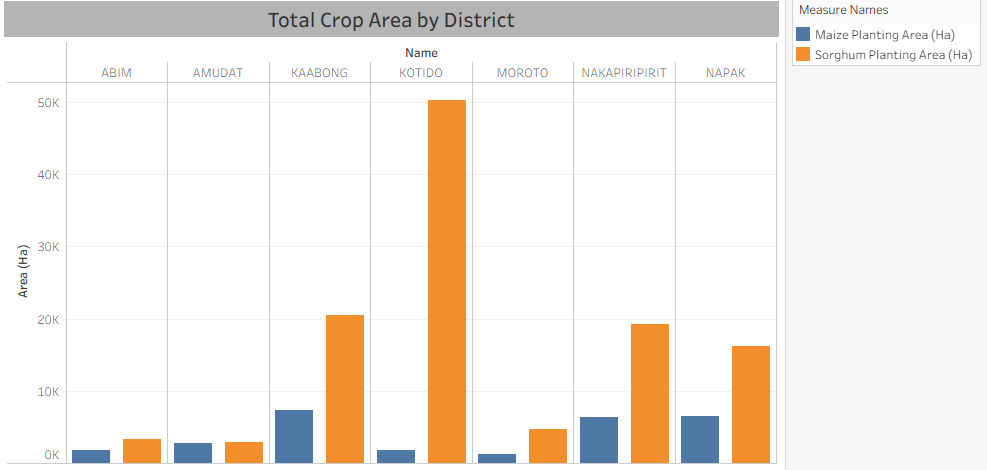

### Population per Capita

**Nakupiripirit and Kotido lead in per capita production** (101.99 and 76.67) respectively, indicating that **relative to population, these districts produce a surplu**s. **Kaabong and especially Moroto** are the **lowest** (20.28 and 8.05 resp.), showing **significant production pressure relative to population**.

**Nakupiripirit and Kotido** are **better positioned to meet household food needs** and may even have surplases. On the other hand, **Moroto shows critical underproduction**, raising concerns about food shortages. **Kaabang's low production per capita value, despite high yields**, suggests **population pressure**.

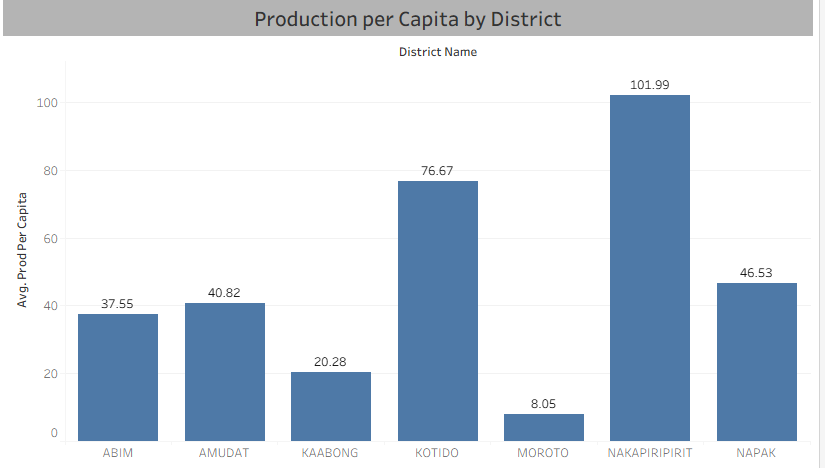

### Total Population vs Total Production

Kotido and Nakupiripirit emerge as surplus-producing districts, capable of supporting their own populations and potentially supplying neighbouring areas. Napak, Amudat and Kaabong appear self-sufficient but with less surplus, while Moroto and Abim represent low-scale systems with minimal contribution to regional food stocks likely due to lower cultivated areas or less favourable growing conditions.

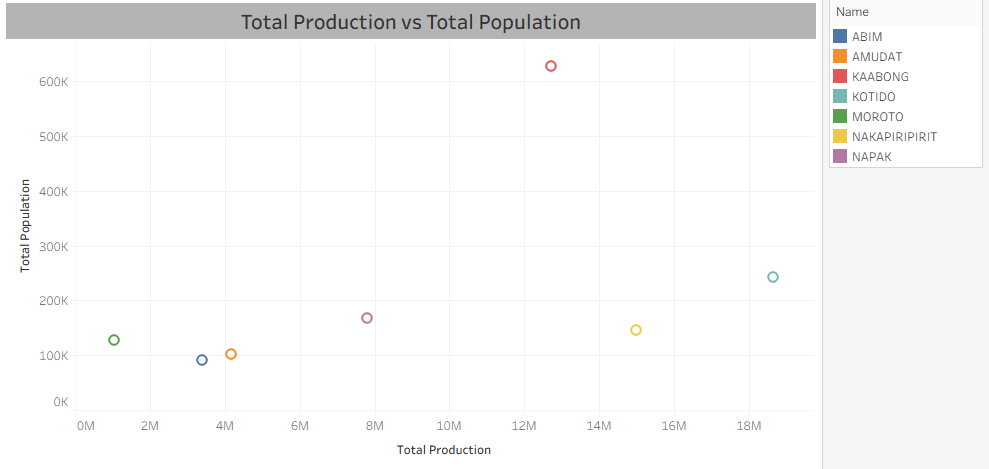

## Conclusions

- Most districts such as **Kotido** heavily rely on sorghum production than maize production.
- **Sorghum and maize yields and production vary significantly across districts** and subcounties, with some areas such as **Moroto District** consistently underperfoming due to harsher drought effects.
- Moroto, Abim and Amudat contribute less to the regional food basket, with both **low crop area and production**.
- Districts like Kotido and Nakupiripirit consistently produce surplus relative to population making them **regional supply hubs.**
- Some districts such as Kaabong show good yields but low production per capita due to higher population relative to farmland, stressing the need to integrate demographic trends.



## Recommendations

- **Prioritize high-risk districts and sub-counties.** Direct NGO interventions (farm inputs, drought-resistant seeds) to districts with the lowest food production per capita such as Kaabong and Moroto.
- **Promote crop diversification.** Encourage farmers to balance maize and sorghum cultivation or even introduce legumes such as beans or root crops such as cassava to reduce risk from crop-specific shocks.
- **Apply Targeted Resource Allocation.** Use yield maps to distribute resources e.g fertilizers, more effectively rather than evenly across districts.
- **Early warning systems.** Develop a monitoring framework that updates yield estimates annually or seasonally to detect emerging food security risks early.
- **Promote soil health programs** such as use of organic manure, crop rotation, and soil conservation practices to improve yields sustainably.
- **Introduce modern farming methods** such as irrigation and use of greenhouses to improve crop yields and help unlock currently unused land in the region

## Dashboard Snapshot

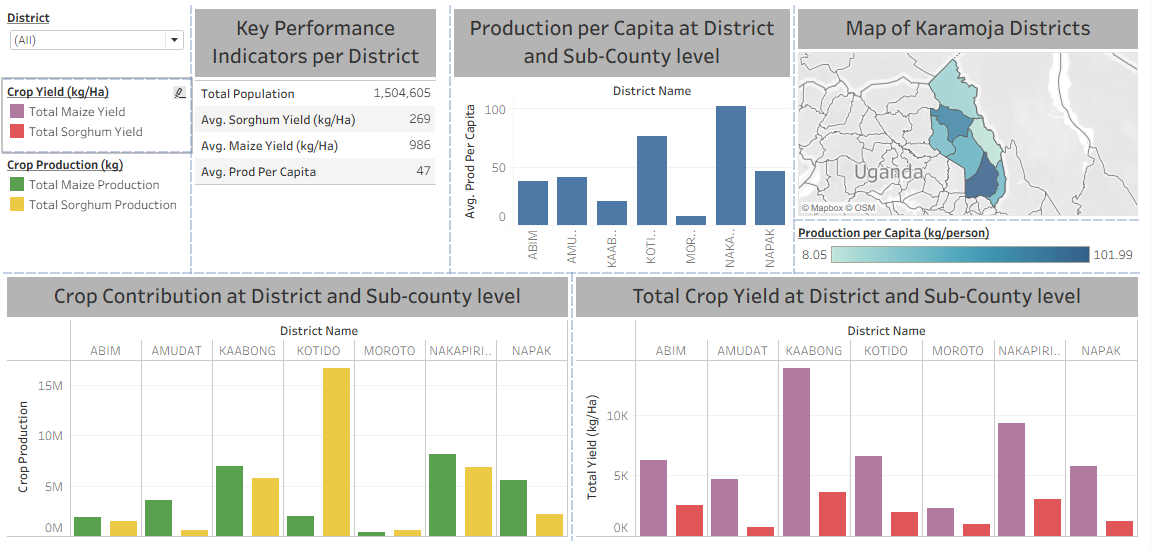